In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train = pd.read_csv('train.csv')
train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [68]:
train.shape

(42748, 14)

In [69]:
train.duplicated().sum()

91

In [70]:
train = train.drop_duplicates(keep = 'first')
train.shape

(42657, 14)

In [71]:
train.isnull().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6910
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42657 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42657 non-null  object 
 1   cap-diameter          42657 non-null  float64
 2   cap-shape             42657 non-null  object 
 3   cap-color             42657 non-null  object 
 4   does-bruise-or-bleed  42657 non-null  object 
 5   gill-attachment       35747 non-null  object 
 6   gill-color            42657 non-null  object 
 7   stem-height           42657 non-null  float64
 8   stem-width            42657 non-null  float64
 9   stem-color            42657 non-null  object 
 10  has-ring              42657 non-null  object 
 11  ring-type             40938 non-null  object 
 12  habitat               42657 non-null  object 
 13  season                42657 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.9+ MB


In [73]:
test = pd.read_csv('test.csv')
test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,NaN,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,NaN,d,NaN
2,p,9.26,x,w,t,NaN,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [74]:
test.shape

(18321, 14)

In [75]:
test.isnull().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

In [76]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(60978, 14)

In [77]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60978 entries, 0 to 18320
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      60978 non-null  object 
 1   cap-diameter          60978 non-null  float64
 2   cap-shape             60978 non-null  object 
 3   cap-color             60978 non-null  object 
 4   does-bruise-or-bleed  60978 non-null  object 
 5   gill-attachment       51124 non-null  object 
 6   gill-color            60978 non-null  object 
 7   stem-height           60978 non-null  float64
 8   stem-width            60978 non-null  float64
 9   stem-color            60978 non-null  object 
 10  has-ring              60978 non-null  object 
 11  ring-type             58507 non-null  object 
 12  habitat               60978 non-null  object 
 13  season                42657 non-null  object 
dtypes: float64(3), object(11)
memory usage: 7.0+ MB


In [78]:
combined['gill-attachment'].value_counts()

a    12698
d    10247
x     7413
p     6001
s     5648
e     5648
f     3469
Name: gill-attachment, dtype: int64

In [79]:
combined['ring-type'].value_counts()

f    48270
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [80]:
x = ['gill-attachment', 'ring-type']
for i in x:
    combined[i] = combined[i].fillna(combined[i].value_counts().index[0])

In [81]:
combined['gill-attachment'].value_counts()

a    22552
d    10247
x     7413
p     6001
s     5648
e     5648
f     3469
Name: gill-attachment, dtype: int64

In [82]:
combined['ring-type'].value_counts()

f    50741
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [83]:
combined.isnull().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                  18321
dtype: int64

In [84]:
newtrain = combined.iloc[0:42657, :]
newtrain.shape

(42657, 14)

In [85]:
newtest = combined.iloc[42657: , :]
newtest = newtest.drop('season', axis = 1)
newtest.shape

(18321, 13)

In [86]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42657 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42657 non-null  object 
 1   cap-diameter          42657 non-null  float64
 2   cap-shape             42657 non-null  object 
 3   cap-color             42657 non-null  object 
 4   does-bruise-or-bleed  42657 non-null  object 
 5   gill-attachment       42657 non-null  object 
 6   gill-color            42657 non-null  object 
 7   stem-height           42657 non-null  float64
 8   stem-width            42657 non-null  float64
 9   stem-color            42657 non-null  object 
 10  has-ring              42657 non-null  object 
 11  ring-type             42657 non-null  object 
 12  habitat               42657 non-null  object 
 13  season                42657 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.9+ MB


In [87]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18321 entries, 0 to 18320
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      18321 non-null  object 
 1   cap-diameter          18321 non-null  float64
 2   cap-shape             18321 non-null  object 
 3   cap-color             18321 non-null  object 
 4   does-bruise-or-bleed  18321 non-null  object 
 5   gill-attachment       18321 non-null  object 
 6   gill-color            18321 non-null  object 
 7   stem-height           18321 non-null  float64
 8   stem-width            18321 non-null  float64
 9   stem-color            18321 non-null  object 
 10  has-ring              18321 non-null  object 
 11  ring-type             18321 non-null  object 
 12  habitat               18321 non-null  object 
dtypes: float64(3), object(10)
memory usage: 2.0+ MB


In [88]:
newtrain.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [89]:
x = ['edible-poisonous', 'does-bruise-or-bleed', 'has-ring']
for i in x:
    newtrain[i] = newtrain[i].replace({'p': 1, 'e': 0, 't': 1, 'f': 0})
    newtest[i] = newtest[i].replace({'p': 1, 'e': 0, 't': 1, 'f': 0})

<ipython-input-89-8a1ca655176d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[i] = newtrain[i].replace({'p': 1, 'e': 0, 't': 1, 'f': 0})


In [90]:
for i in x:
    newtrain[i] = newtrain[i].astype(int)
    newtest[i] = newtest[i].astype(int)

<ipython-input-90-7387f81b7a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[i] = newtrain[i].astype(int)


In [91]:
cat_columns = newtest.select_dtypes(include= 'object')
cat_columns.columns

Index(['cap-shape', 'cap-color', 'gill-attachment', 'gill-color', 'stem-color',
       'ring-type', 'habitat'],
      dtype='object')

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
for i in cat_columns.columns:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

<ipython-input-93-7e0629d08f84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[i] = le.fit_transform(newtrain[i])


In [94]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42657 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42657 non-null  int32  
 1   cap-diameter          42657 non-null  float64
 2   cap-shape             42657 non-null  int32  
 3   cap-color             42657 non-null  int32  
 4   does-bruise-or-bleed  42657 non-null  int32  
 5   gill-attachment       42657 non-null  int32  
 6   gill-color            42657 non-null  int32  
 7   stem-height           42657 non-null  float64
 8   stem-width            42657 non-null  float64
 9   stem-color            42657 non-null  int32  
 10  has-ring              42657 non-null  int32  
 11  ring-type             42657 non-null  int32  
 12  habitat               42657 non-null  int32  
 13  season                42657 non-null  object 
dtypes: float64(3), int32(10), object(1)
memory usage: 3.3+ MB


In [95]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18321 entries, 0 to 18320
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      18321 non-null  int32  
 1   cap-diameter          18321 non-null  float64
 2   cap-shape             18321 non-null  int32  
 3   cap-color             18321 non-null  int32  
 4   does-bruise-or-bleed  18321 non-null  int32  
 5   gill-attachment       18321 non-null  int32  
 6   gill-color            18321 non-null  int32  
 7   stem-height           18321 non-null  float64
 8   stem-width            18321 non-null  float64
 9   stem-color            18321 non-null  int32  
 10  has-ring              18321 non-null  int32  
 11  ring-type             18321 non-null  int32  
 12  habitat               18321 non-null  int32  
dtypes: float64(3), int32(10)
memory usage: 1.3 MB


In [96]:
x = newtrain.iloc[:, 0:-1].values
y = newtrain.iloc[:, -1]

In [97]:
from keras.utils import np_utils

In [98]:
le.fit(y)
y = le.transform(y)
y = np_utils.to_categorical(y)

In [99]:
x.shape

(42657, 13)

In [100]:
y.shape

(42657, 4)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc = StandardScaler()

In [105]:
x_train = sc.fit_transform(x_train)

In [106]:
x_test = sc.transform(x_test)

# ANN

In [107]:
from keras.layers import Dense, Activation

In [108]:
from keras.models import Sequential

In [109]:
from keras.optimizers import Adam

In [110]:
model = Sequential()

model.add(Dense(64, input_shape = (13, ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [111]:
model.fit(x_train, y_train, epochs= 15, validation_data= (x_test, y_test))

Epoch 1/15
934/934 [==============================] - 4s 3ms/step - loss: 1.0479 - accuracy: 0.4773 - val_loss: 0.9167 - val_accuracy: 0.5141
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9014 - accuracy: 0.5109 - val_loss: 0.8640 - val_accuracy: 0.5210
Epoch 3/15
934/934 [==============================] - 2s 3ms/step - loss: 0.8517 - accuracy: 0.5233 - val_loss: 0.8440 - val_accuracy: 0.5047
Epoch 4/15
934/934 [==============================] - 2s 3ms/step - loss: 0.8354 - accuracy: 0.5179 - val_loss: 0.8276 - val_accuracy: 0.5197
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 0.8145 - accuracy: 0.5262 - val_loss: 0.8177 - val_accuracy: 0.5195
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 0.8062 - accuracy: 0.5286 - val_loss: 0.8121 - val_accuracy: 0.5207
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 0.7997 - accuracy: 0.5276 - val_loss: 0.7966 - val_accuracy: 0.5243
Epoch 

In [112]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 2016x720 with 0 Axes>

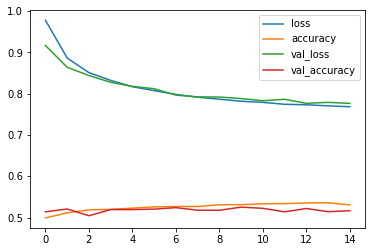

In [113]:
plt.figure(figsize= (28, 10))
losses.plot()

In [114]:
y_pred = model.predict_classes(x_test)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [115]:
y_pred

array([0, 0, 3, ..., 0, 0, 0], dtype=int64)

In [116]:
newtest.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat
0,0,4.68,6,10,0,6,10,8.22,9.58,6,1,1,1
1,1,10.33,6,11,0,0,11,11.98,13.29,12,1,1,0
2,1,9.26,6,10,1,0,10,7.41,12.68,11,1,3,1
3,1,14.90,5,10,1,1,10,5.33,23.03,11,0,1,0
4,1,1.01,6,10,0,0,10,3.17,1.64,1,0,1,3


In [186]:
x_train = newtrain.drop('season', axis = 1)
y_train = newtrain['season']
x_test = newtest

In [187]:
from keras.utils import np_utils

In [188]:
le.fit(y_train)
y_train = le.transform(y_train)
y_train = np_utils.to_categorical(y_train)

In [189]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
sc = StandardScaler()

In [167]:
x_train = sc.fit_transform(x_train)

In [168]:
x_test = sc.transform(x_test)

In [169]:
model = Sequential()

model.add(Dense(64, input_shape = (13, ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [170]:
model.fit(x_train, y_train, epochs= 15)

Epoch 1/15
1334/1334 [==============================] - 4s 2ms/step - loss: 1.0162 - accuracy: 0.4909
Epoch 2/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.8921 - accuracy: 0.5113
Epoch 3/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.8425 - accuracy: 0.5240
Epoch 4/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.8240 - accuracy: 0.5236
Epoch 5/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.8095 - accuracy: 0.5235
Epoch 6/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.7974 - accuracy: 0.5242
Epoch 7/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.7939 - accuracy: 0.5265
Epoch 8/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.7904 - accuracy: 0.5257
Epoch 9/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.7864 - accuracy: 0.5248
Epoch 10/15
1334/1334 [==============================] - 3s 2ms/step - loss: 0.779

In [172]:
predictions = model.predict(x_test)

In [173]:
predictions

array([[4.6336570e-01, 1.5799108e-01, 3.7843645e-01, 2.0678941e-04],
       [5.9720755e-01, 6.0906209e-06, 4.0146062e-01, 1.3257584e-03],
       [5.4348636e-01, 1.1005582e-06, 4.5648599e-01, 2.6486901e-05],
       ...,
       [5.3226233e-01, 1.0145609e-03, 4.6672130e-01, 1.7803347e-06],
       [3.5851091e-01, 2.3867878e-04, 6.4028519e-01, 9.6525351e-04],
       [4.9331298e-01, 3.3290480e-04, 5.0626630e-01, 8.7804103e-05]],
      dtype=float32)

In [174]:
np.argmax(predictions, axis = 1)

array([0, 0, 0, ..., 0, 2, 2], dtype=int64)

In [175]:
output = np.argmax(predictions, axis = 1)
output

array([0, 0, 0, ..., 0, 2, 2], dtype=int64)

In [176]:
type(output)

numpy.ndarray

In [192]:
solution = pd.DataFrame({'season' : output})
solution.head()

,season
0,0
1,0
2,0
3,0
4,2


In [196]:
newtrain['season'].value_counts()

a    21083
u    16019
w     3679
s     1876
Name: season, dtype: int64

In [195]:
solution['season'].value_counts()

0    9239
2    6145
3    2052
1     885
Name: season, dtype: int64

In [197]:
solution['season'] = solution['season'].replace({0: 'a', 2 : 'u', 3 : 'w', 1 : 's'})

In [198]:
solution.to_csv('Solution.csv', index = False)